In [1]:
# from getdist import plots, MCSamples
%matplotlib inline
from matplotlib import pyplot as plt
# import getdist
import numpy as np
import os
import sys
sys.path.append('../Cls/')
import common as co

DCOLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
carlosdir = '/mnt/extraspace/gravityls_3/S8z/Cls/all_together_metacal_new/'
carlosdir512 = '/mnt/extraspace/gravityls_3/S8z/Cls/all_together_metacal_512_new/'
fiddir = '/mnt/extraspace/gravityls_3/S8z/Cls/fiducial/nobaryons/'
############# Load obs. cl matrix

outdir = carlosdir 
outdir512 = carlosdir512


lbpw_obs_cls_all = np.load(os.path.join(outdir, 'cl_all_no_noise.npz'))
lbpw, obs_cls_all = lbpw_obs_cls_all['l'], lbpw_obs_cls_all['cls']

lbpw_obs_cls_all = np.load(os.path.join(outdir, 'cl_all_with_noise.npz'))
lbpw, obs_cls_all_wn = lbpw_obs_cls_all['l'], lbpw_obs_cls_all['cls']

lbpw_obs_cls_all512 = np.load(os.path.join(outdir512, 'cl_all_no_noise.npz'))
lbpw512, obs_cls_all512 = lbpw_obs_cls_all512['l'], lbpw_obs_cls_all512['cls']


############### Load DES sh. noise

outdir = carlosdir
desgc_nls_arr = np.load(os.path.join(outdir, 'des_w_cl_shot_noise_ns4096.npz'))['cls']
dessh_nls_arr = np.load(os.path.join(outdir, 'des_sh_metacal_noise_ns4096.npz'))['cls']
# dessh_nls_arr2 = np.load(os.path.join(outdir, 'des_sh_metacal_rot0-19_noise_ns512.npz'))['cls']

#######
labels = ['\delta_0', '\delta_1', '\delta_2', '\delta_3', '\delta_4',
          '\gamma_{E0}', '\gamma_{B0}', '\gamma_{E1}', '\gamma_{B1}', 
          '\gamma_{E2}', '\gamma_{B2}', '\gamma_{E3}', '\gamma_{B3}', 
          '\kappa_P']
######
gclist = ['gc0', 'gc1', 'gc2', 'gc3', 'gc4']
shlist = ['wl0', 'wl1', 'wl2', 'wl3']
cvlist = ['PLAcv']

## Check my noise implementation

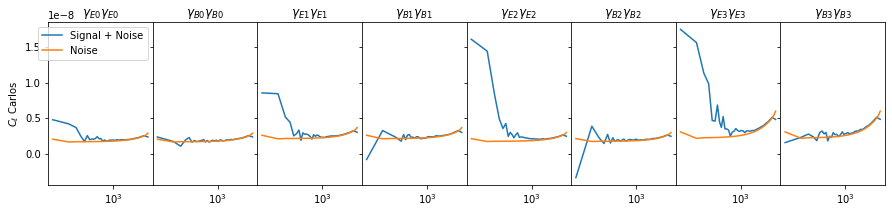

In [3]:
# Check if shear-shear is dominated by noise. That would affect the chi2 if noise is not exactly the same.

f, axs = plt.subplots(1, 8, figsize=(15, 3), sharex=True, sharey='row', gridspec_kw={'hspace':0, 'wspace':0})
axs = axs.reshape((1,-1))

# wl-wl
for i, itype in enumerate(shlist):
    ixplot = 2*i
    # EE
    axs[0, ixplot].semilogx(lbpw, obs_cls_all_wn[5+i*2, 5+i*2], label='Signal + Noise')
    axs[0, ixplot].semilogx(lbpw, dessh_nls_arr[i, 0, 0], label='Noise')
#     axs[0, ixplot].semilogx(lbpw, dessh_nls_arr2[i, 0, 0], label='Noise rot')
    axs[0, ixplot].set_title('${}{}$'.format(labels[5 + ixplot], labels[5 + ixplot]))
    
    # BB
    axs[0, ixplot+1].semilogx(lbpw, obs_cls_all_wn[6+i*2, 6+i*2], label='Signal + Noise')
    axs[0, ixplot+1].semilogx(lbpw, dessh_nls_arr[i, 1, 1], label='Noise')
#     axs[0, ixplot+1].semilogx(lbpw, dessh_nls_arr2[i, 1, 1], label='Noise')
    axs[0, ixplot+1].set_title('${}{}$'.format(labels[5 + ixplot +1], labels[5 + ixplot + 1]))

    
axs[0, 0].set_ylabel(r'$C_\ell$ Carlos')
axs[0, 0].legend(loc=0)
plt.show()
plt.close()

## $C_\ell$

### Only 4096

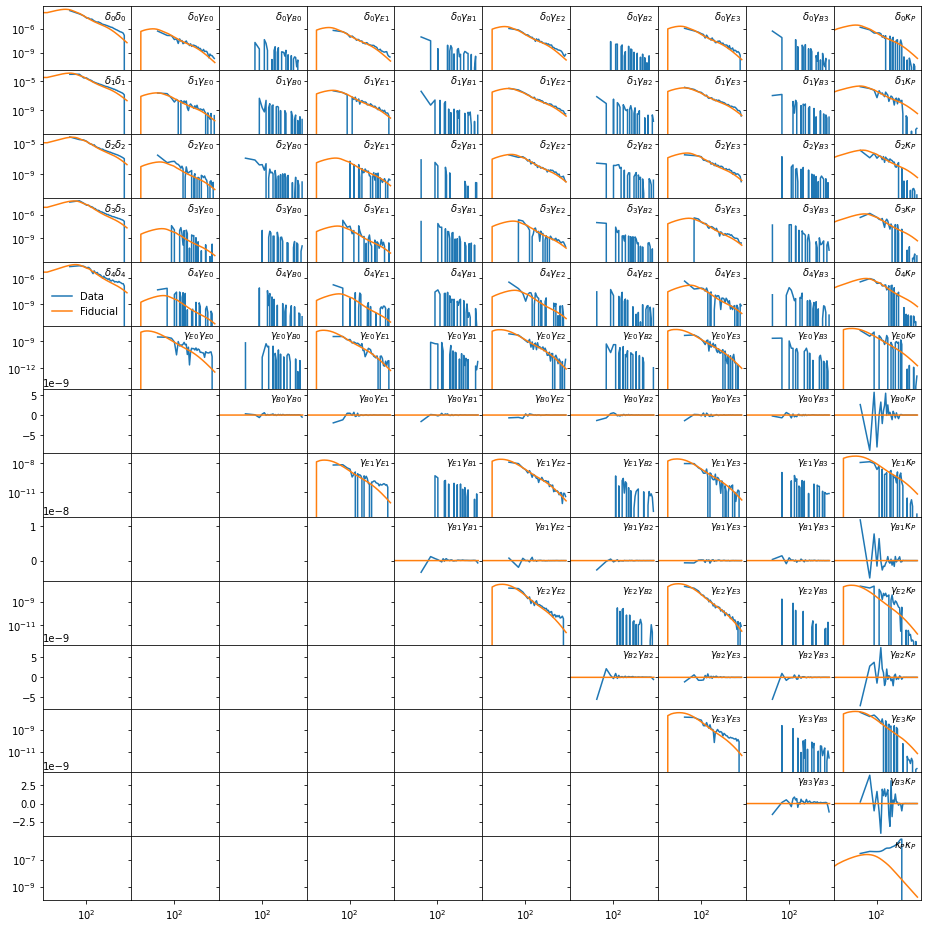

In [3]:
f, axs = plt.subplots(14, 10, figsize=(13, 13), sharex=True, sharey='row', gridspec_kw={'hspace':0, 'wspace':0})

labels = ['\delta_0', '\delta_1', '\delta_2', '\delta_3', '\delta_4',
          '\gamma_{E0}', '\gamma_{B0}', '\gamma_{E1}', '\gamma_{B1}', 
          '\gamma_{E2}', '\gamma_{B2}', '\gamma_{E3}', '\gamma_{B3}', 
          '\kappa_P']


# gc-gc
for i, itype in enumerate(gclist):
    cls = obs_cls_all[i, i]
    axs[i, 0].semilogx(lbpw, cls, label='Data')
    clsfid = np.load(fiddir + 'cls_DES{0}_DES{0}.npz'.format(itype))
    axs[i, 0].semilogx(clsfid['ells'], clsfid['cls'], label='Fiducial')
    axs[i, 0].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[i]), horizontalalignment='right',
                   verticalalignment='top', transform=axs[i, 0].transAxes)

# gc-wl
for i, itype in enumerate(gclist):
    for j, jtype in enumerate(shlist):
        jcls = 5 + 2*j
        jxplot = 1 + 2*j 
        clsfid = np.load(fiddir + 'cls_DES{0}_DES{1}.npz'.format(itype, jtype))


        
        cls = obs_cls_all[i, jcls] # E
        axs[i, jxplot].semilogx(lbpw, cls, label='Data')
        axs[i, jxplot].semilogx(clsfid['ells'], clsfid['cls'], label='Fiducial')
        axs[i, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[jcls]), horizontalalignment='right',
            verticalalignment='top', transform=axs[i, jxplot].transAxes)
        
        cls = obs_cls_all[i, jcls + 1] # B
        axs[i, jxplot+1].semilogx(lbpw, cls, label='Data')
        axs[i, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')
        axs[i, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[i, jxplot+1].transAxes)
        
# wl-wl
for i, itype in enumerate(shlist):
    icls = 5 + 2*i
    ixplot = 5 + 2*i 
    for j, jtype in enumerate(shlist[i:], i):        
        jcls = 5 + 2*j
        jxplot = 1 + 2*j
        clsfid = np.load(fiddir + 'cls_DES{0}_DES{1}.npz'.format(itype, jtype))
        
        cls = obs_cls_all[icls, jcls] # EE
        axs[ixplot, jxplot].semilogx(lbpw, cls, label='Data')
        axs[ixplot, jxplot].semilogx(clsfid['ells'], clsfid['cls'], label='Fiducial')
        axs[ixplot, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[icls], labels[jcls]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot, jxplot].transAxes)
        
        cls = obs_cls_all[icls, jcls + 1] # EB
        axs[ixplot, jxplot+1].semilogx(lbpw, cls, label='Data')
        axs[ixplot, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')
        axs[ixplot, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[icls], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot, jxplot+1].transAxes)
        
        if itype != jtype:
            cls = obs_cls_all[icls+1, jcls] # BE
            axs[ixplot+1, jxplot].semilogx(lbpw, cls, label='Data')
            axs[ixplot+1, jxplot].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')
            axs[ixplot+1, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[icls+1], labels[jcls]),
                                       horizontalalignment='right', verticalalignment='top',
                                       transform=axs[ixplot+1, jxplot].transAxes)
        
        cls = obs_cls_all[icls+1, jcls + 1] # BB
        axs[ixplot+1, jxplot+1].semilogx(lbpw, cls, label='Data')
        axs[ixplot+1, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')        
        axs[ixplot+1, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[icls+1], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot+1, jxplot+1].transAxes)    

# all - cv
for i, itype in enumerate(gclist + 2*shlist + cvlist):
    cls = obs_cls_all[i, -1]
    axs[i, -1].semilogx(lbpw, cls, label='Data')
    clsfid = np.load(fiddir + 'cls_{}{}_PLAcv.npz'.format('DES' if itype != 'PLAcv' else '', itype))
    if '_{B' in labels[i]:
        axs[i, -1].semilogx(clsfid['ells'], clsfid['cls']*0, label='Fiducial')
    else:
        axs[i, -1].semilogx(clsfid['ells'], clsfid['cls'], label='Fiducial')
        
    axs[i, -1].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[-1]), horizontalalignment='right',
                   verticalalignment='top', transform=axs[i, -1].transAxes)

    
for i, label in enumerate(labels):
    if not '_{B' in label:
        axs[i, 0].set_yscale('log')
    
# for ixplot in range(5, 9):
#     for jxplot in range(6):
#         if (ixplot > 4) and (jxplot < ixplot - 4):
#             axs[ixplot, jxplot].set_visible(False)
#         if (ixplot > 4) and (jxplot == ixplot - 4):
#             axs[ixplot, jxplot].set_xlabel(r'$\ell$')
#             axs[ixplot, jxplot].set_ylabel(r'$10^{{ {} }} C_{{\ell}}$'.format(int(floor)))
#             axs[ixplot, jxplot].xaxis.set_tick_params(which='both', labelbottom=True)
#             axs[ixplot, jxplot].yaxis.set_tick_params(which='both', labelbottom=True)
            
axs[4,0].legend(loc='lower left', frameon=False)

plt.tight_layout()
plt.show()
plt.close()

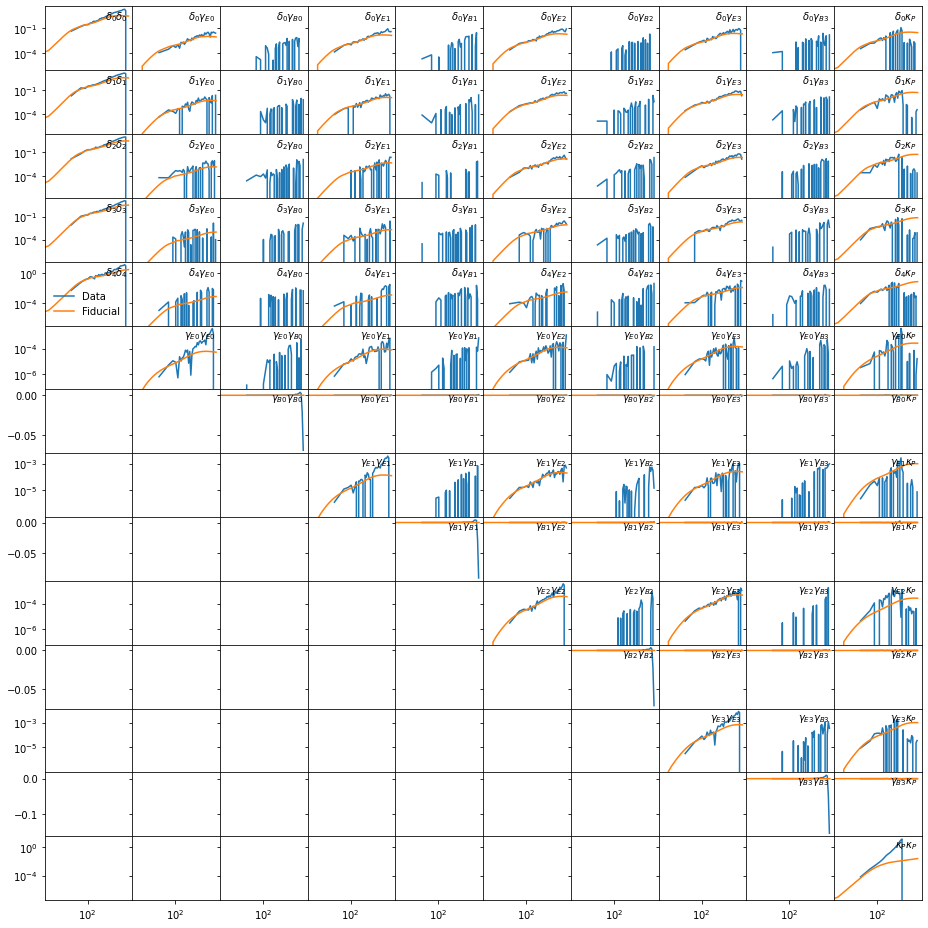

In [4]:
f, axs = plt.subplots(14, 10, figsize=(13, 13), sharex=True, sharey='row', gridspec_kw={'hspace':0, 'wspace':0})

labels = ['\delta_0', '\delta_1', '\delta_2', '\delta_3', '\delta_4',
          '\gamma_{E0}', '\gamma_{B0}', '\gamma_{E1}', '\gamma_{B1}', 
          '\gamma_{E2}', '\gamma_{B2}', '\gamma_{E3}', '\gamma_{B3}', 
          '\kappa_P']


# gc-gc
for i, itype in enumerate(gclist):
    cls = obs_cls_all[i, i]
    factor = lbpw * (lbpw + 1)
    axs[i, 0].semilogx(lbpw, cls*factor, label='Data')
    
    clsfid = np.load(fiddir + 'cls_DES{0}_DES{0}.npz'.format(itype))
    factorfid = clsfid['ells'] * (clsfid['ells'] +1)
    axs[i, 0].semilogx(clsfid['ells'], clsfid['cls']*factorfid, label='Fiducial')
    axs[i, 0].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[i]), horizontalalignment='right',
                   verticalalignment='top', transform=axs[i, 0].transAxes)

# gc-wl
for i, itype in enumerate(gclist):
    for j, jtype in enumerate(shlist):
        jcls = 5 + 2*j
        jxplot = 1 + 2*j 
        clsfid = np.load(fiddir + 'cls_DES{0}_DES{1}.npz'.format(itype, jtype))


        
        cls = obs_cls_all[i, jcls] # E
        axs[i, jxplot].semilogx(lbpw, cls*factor, label='Data')
        axs[i, jxplot].semilogx(clsfid['ells'], clsfid['cls']*factorfid, label='Fiducial')
        axs[i, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[jcls]), horizontalalignment='right',
            verticalalignment='top', transform=axs[i, jxplot].transAxes)
        
        cls = obs_cls_all[i, jcls + 1] # B
        axs[i, jxplot+1].semilogx(lbpw, cls*factor, label='Data')
        axs[i, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')
        axs[i, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[i, jxplot+1].transAxes)
        
# wl-wl
for i, itype in enumerate(shlist):
    icls = 5 + 2*i
    ixplot = 5 + 2*i 
    for j, jtype in enumerate(shlist[i:], i):        
        jcls = 5 + 2*j
        jxplot = 1 + 2*j
        clsfid = np.load(fiddir + 'cls_DES{0}_DES{1}.npz'.format(itype, jtype))
        
        cls = obs_cls_all[icls, jcls] # EE
        axs[ixplot, jxplot].semilogx(lbpw, cls*factor, label='Data')
        axs[ixplot, jxplot].semilogx(clsfid['ells'], clsfid['cls']*factorfid, label='Fiducial')
        axs[ixplot, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[icls], labels[jcls]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot, jxplot].transAxes)
        
        cls = obs_cls_all[icls, jcls + 1] # EB
        axs[ixplot, jxplot+1].semilogx(lbpw, cls*factor, label='Data')
        axs[ixplot, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')
        axs[ixplot, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[icls], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot, jxplot+1].transAxes)
        
        if itype != jtype:
            cls = obs_cls_all[icls+1, jcls] # BE
            axs[ixplot+1, jxplot].semilogx(lbpw, cls*factor, label='Data')
            axs[ixplot+1, jxplot].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')
            axs[ixplot+1, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[icls+1], labels[jcls]),
                                       horizontalalignment='right', verticalalignment='top',
                                       transform=axs[ixplot+1, jxplot].transAxes)
        
        cls = obs_cls_all[icls+1, jcls + 1] # BB
        axs[ixplot+1, jxplot+1].semilogx(lbpw, cls*factor, label='Data')
        axs[ixplot+1, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')        
        axs[ixplot+1, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[icls+1], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot+1, jxplot+1].transAxes)    

# all - cv
for i, itype in enumerate(gclist + 2*shlist + cvlist):
    cls = obs_cls_all[i, -1]
    axs[i, -1].semilogx(lbpw, cls*factor, label='Data')
    clsfid = np.load(fiddir + 'cls_{}{}_PLAcv.npz'.format('DES' if itype != 'PLAcv' else '', itype))
    if '_{B' in labels[i]:
        axs[i, -1].semilogx(clsfid['ells'], clsfid['cls']*0, label='Fiducial')
    else:
        axs[i, -1].semilogx(clsfid['ells'], clsfid['cls']*factorfid, label='Fiducial')
        
    axs[i, -1].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[-1]), horizontalalignment='right',
                   verticalalignment='top', transform=axs[i, -1].transAxes)

    
for i, label in enumerate(labels):
    if not '_{B' in label:
        axs[i, 0].set_yscale('log')
    
# for ixplot in range(5, 9):
#     for jxplot in range(6):
#         if (ixplot > 4) and (jxplot < ixplot - 4):
#             axs[ixplot, jxplot].set_visible(False)
#         if (ixplot > 4) and (jxplot == ixplot - 4):
#             axs[ixplot, jxplot].set_xlabel(r'$\ell$')
#             axs[ixplot, jxplot].set_ylabel(r'$10^{{ {} }} C_{{\ell}}$'.format(int(floor)))
#             axs[ixplot, jxplot].xaxis.set_tick_params(which='both', labelbottom=True)
#             axs[ixplot, jxplot].yaxis.set_tick_params(which='both', labelbottom=True)
            
axs[4,0].legend(loc='lower left', frameon=False)

plt.tight_layout()
plt.show()
plt.close()

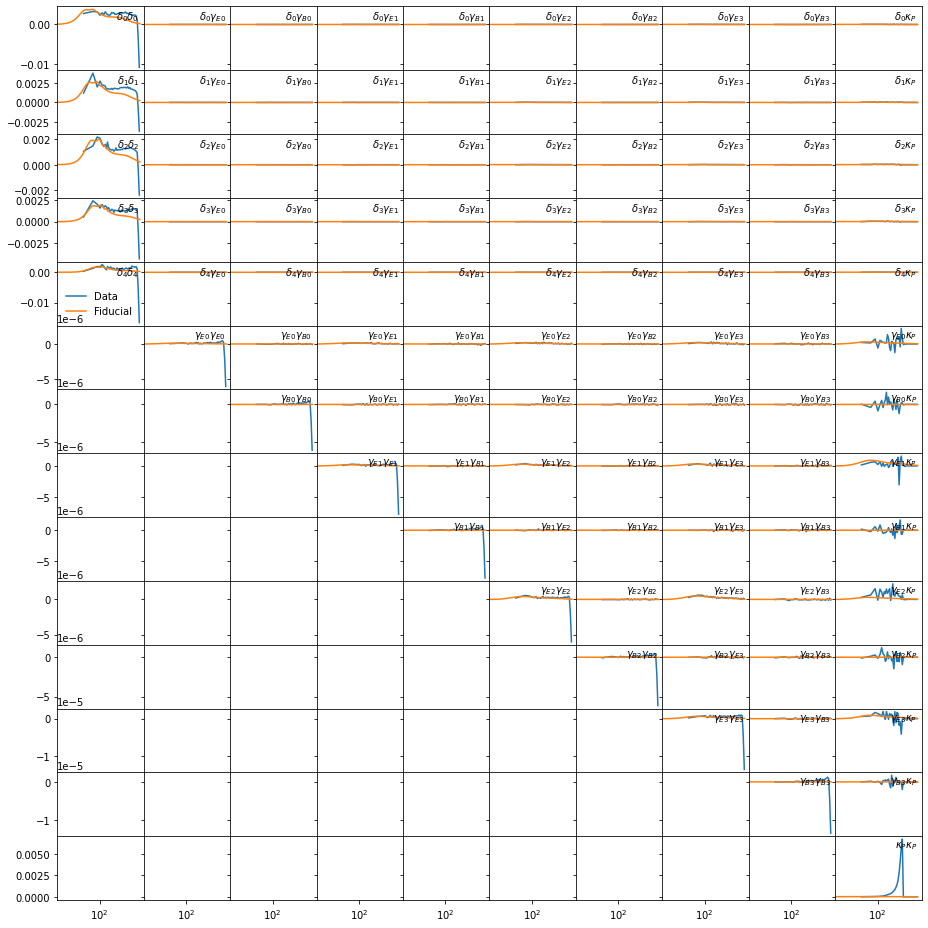

In [5]:
f, axs = plt.subplots(14, 10, figsize=(13, 13), sharex=True, sharey='row', gridspec_kw={'hspace':0, 'wspace':0})

labels = ['\delta_0', '\delta_1', '\delta_2', '\delta_3', '\delta_4',
          '\gamma_{E0}', '\gamma_{B0}', '\gamma_{E1}', '\gamma_{B1}', 
          '\gamma_{E2}', '\gamma_{B2}', '\gamma_{E3}', '\gamma_{B3}', 
          '\kappa_P']


# gc-gc
for i, itype in enumerate(gclist):
    cls = obs_cls_all[i, i]
    factor = lbpw
    axs[i, 0].semilogx(lbpw, cls*factor, label='Data')
    
    clsfid = np.load(fiddir + 'cls_DES{0}_DES{0}.npz'.format(itype))
    factorfid = clsfid['ells']
    axs[i, 0].semilogx(clsfid['ells'], clsfid['cls']*factorfid, label='Fiducial')
    axs[i, 0].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[i]), horizontalalignment='right',
                   verticalalignment='top', transform=axs[i, 0].transAxes)

# gc-wl
for i, itype in enumerate(gclist):
    for j, jtype in enumerate(shlist):
        jcls = 5 + 2*j
        jxplot = 1 + 2*j 
        clsfid = np.load(fiddir + 'cls_DES{0}_DES{1}.npz'.format(itype, jtype))


        
        cls = obs_cls_all[i, jcls] # E
        axs[i, jxplot].semilogx(lbpw, cls*factor, label='Data')
        axs[i, jxplot].semilogx(clsfid['ells'], clsfid['cls']*factorfid, label='Fiducial')
        axs[i, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[jcls]), horizontalalignment='right',
            verticalalignment='top', transform=axs[i, jxplot].transAxes)
        
        cls = obs_cls_all[i, jcls + 1] # B
        axs[i, jxplot+1].semilogx(lbpw, cls*factor, label='Data')
        axs[i, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')
        axs[i, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[i, jxplot+1].transAxes)
        
# wl-wl
for i, itype in enumerate(shlist):
    icls = 5 + 2*i
    ixplot = 5 + 2*i 
    for j, jtype in enumerate(shlist[i:], i):        
        jcls = 5 + 2*j
        jxplot = 1 + 2*j
        clsfid = np.load(fiddir + 'cls_DES{0}_DES{1}.npz'.format(itype, jtype))
        
        cls = obs_cls_all[icls, jcls] # EE
        axs[ixplot, jxplot].semilogx(lbpw, cls*factor, label='Data')
        axs[ixplot, jxplot].semilogx(clsfid['ells'], clsfid['cls']*factorfid, label='Fiducial')
        axs[ixplot, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[icls], labels[jcls]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot, jxplot].transAxes)
        
        cls = obs_cls_all[icls, jcls + 1] # EB
        axs[ixplot, jxplot+1].semilogx(lbpw, cls*factor, label='Data')
        axs[ixplot, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')
        axs[ixplot, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[icls], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot, jxplot+1].transAxes)
        
        if itype != jtype:
            cls = obs_cls_all[icls+1, jcls] # BE
            axs[ixplot+1, jxplot].semilogx(lbpw, cls*factor, label='Data')
            axs[ixplot+1, jxplot].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')
            axs[ixplot+1, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[icls+1], labels[jcls]),
                                       horizontalalignment='right', verticalalignment='top',
                                       transform=axs[ixplot+1, jxplot].transAxes)
        
        cls = obs_cls_all[icls+1, jcls + 1] # BB
        axs[ixplot+1, jxplot+1].semilogx(lbpw, cls*factor, label='Data')
        axs[ixplot+1, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')        
        axs[ixplot+1, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[icls+1], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot+1, jxplot+1].transAxes)    

# all - cv
for i, itype in enumerate(gclist + 2*shlist + cvlist):
    cls = obs_cls_all[i, -1]
    axs[i, -1].semilogx(lbpw, cls*factor, label='Data')
    clsfid = np.load(fiddir + 'cls_{}{}_PLAcv.npz'.format('DES' if itype != 'PLAcv' else '', itype))
    if '_{B' in labels[i]:
        axs[i, -1].semilogx(clsfid['ells'], clsfid['cls']*0, label='Fiducial')
    else:
        axs[i, -1].semilogx(clsfid['ells'], clsfid['cls']*factorfid, label='Fiducial')
        
    axs[i, -1].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[-1]), horizontalalignment='right',
                   verticalalignment='top', transform=axs[i, -1].transAxes)

    
# for i, label in enumerate(labels):
#     if not '_{B' in label:
#         axs[i, 0].set_yscale('log')
    
# for ixplot in range(5, 9):
#     for jxplot in range(6):
#         if (ixplot > 4) and (jxplot < ixplot - 4):
#             axs[ixplot, jxplot].set_visible(False)
#         if (ixplot > 4) and (jxplot == ixplot - 4):
#             axs[ixplot, jxplot].set_xlabel(r'$\ell$')
#             axs[ixplot, jxplot].set_ylabel(r'$10^{{ {} }} C_{{\ell}}$'.format(int(floor)))
#             axs[ixplot, jxplot].xaxis.set_tick_params(which='both', labelbottom=True)
#             axs[ixplot, jxplot].yaxis.set_tick_params(which='both', labelbottom=True)
            
axs[4,0].legend(loc='lower left', frameon=False)

plt.tight_layout()
plt.show()
plt.close()

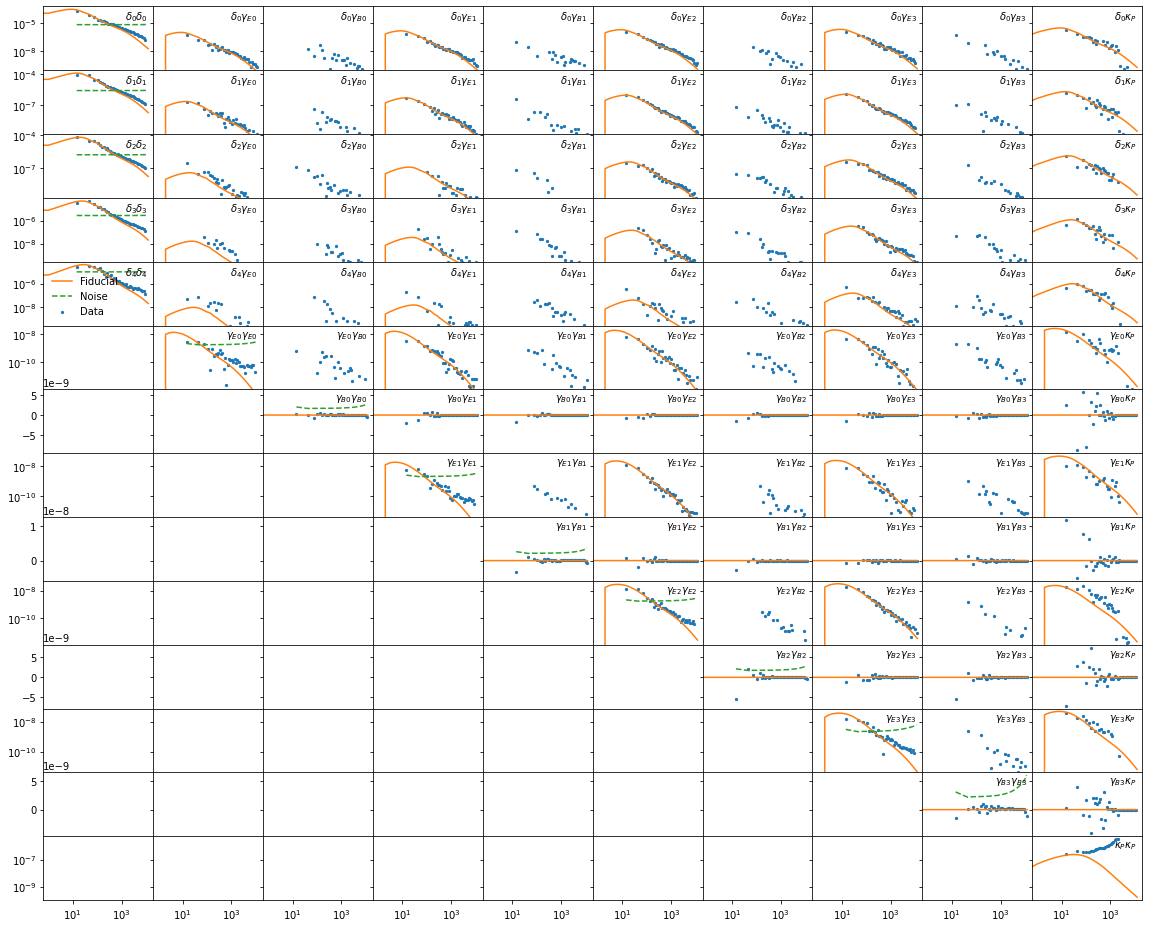

In [6]:
f, axs = plt.subplots(14, 10, figsize=(16, 13), sharex=True, sharey='row', gridspec_kw={'hspace':0, 'wspace':0})

labels = ['\delta_0', '\delta_1', '\delta_2', '\delta_3', '\delta_4',
          '\gamma_{E0}', '\gamma_{B0}', '\gamma_{E1}', '\gamma_{B1}', 
          '\gamma_{E2}', '\gamma_{B2}', '\gamma_{E3}', '\gamma_{B3}', 
          '\kappa_P']


# gc-gc
for i, itype in enumerate(gclist):
    cls = obs_cls_all[i, i]
    axs[i, 0].scatter(lbpw, cls, s=5, label='Data')
    clsfid = np.load(fiddir + 'cls_DES{0}_DES{0}.npz'.format(itype))
    axs[i, 0].semilogx(clsfid['ells'], clsfid['cls'], c=DCOLORS[1], label='Fiducial')
    axs[i, 0].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[i]), horizontalalignment='right',
                   verticalalignment='top', transform=axs[i, 0].transAxes)

# gc-wl
for i, itype in enumerate(gclist):
    for j, jtype in enumerate(shlist):
        jcls = 5 + 2*j
        jxplot = 1 + 2*j 
        clsfid = np.load(fiddir + 'cls_DES{0}_DES{1}.npz'.format(itype, jtype))


        
        cls = obs_cls_all[i, jcls] # E
        axs[i, jxplot].scatter(lbpw, cls, s=5, label='Data')
        axs[i, jxplot].semilogx(clsfid['ells'], clsfid['cls'], c=DCOLORS[1], label='Fiducial')
        axs[i, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[jcls]), horizontalalignment='right',
            verticalalignment='top', transform=axs[i, jxplot].transAxes)
        
        cls = obs_cls_all[i, jcls + 1] # B
        axs[i, jxplot+1].scatter(lbpw, cls, s=5, label='Data')
        axs[i, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, c=DCOLORS[1], label='Fiducial')
        axs[i, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[i, jxplot+1].transAxes)
        
# wl-wl
for i, itype in enumerate(shlist):
    icls = 5 + 2*i
    ixplot = 5 + 2*i 
    for j, jtype in enumerate(shlist[i:], i):        
        jcls = 5 + 2*j
        jxplot = 1 + 2*j
        clsfid = np.load(fiddir + 'cls_DES{0}_DES{1}.npz'.format(itype, jtype))
        
        cls = obs_cls_all[icls, jcls] # EE
        axs[ixplot, jxplot].scatter(lbpw, cls, s=5, label='Data')
        axs[ixplot, jxplot].semilogx(clsfid['ells'], clsfid['cls'], c=DCOLORS[1], label='Fiducial')
        axs[ixplot, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[icls], labels[jcls]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot, jxplot].transAxes)
        
        cls = obs_cls_all[icls, jcls + 1] # EB
        axs[ixplot, jxplot+1].scatter(lbpw, cls, s=5, label='Data')
        axs[ixplot, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, c=DCOLORS[1], label='Fiducial')
        axs[ixplot, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[icls], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot, jxplot+1].transAxes)
        
        if itype != jtype:
            cls = obs_cls_all[icls+1, jcls] # BE
            axs[ixplot+1, jxplot].scatter(lbpw, cls, s=5, label='Data')
            axs[ixplot+1, jxplot].semilogx(clsfid['ells'], clsfid['cls'] * 0, c=DCOLORS[1], label='Fiducial')
            axs[ixplot+1, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[icls+1], labels[jcls]),
                                       horizontalalignment='right', verticalalignment='top',
                                       transform=axs[ixplot+1, jxplot].transAxes)
        
        cls = obs_cls_all[icls+1, jcls + 1] # BB
        axs[ixplot+1, jxplot+1].scatter(lbpw, cls, s=5, label='Data')
        axs[ixplot+1, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, c=DCOLORS[1], label='Fiducial')        
        axs[ixplot+1, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[icls+1], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot+1, jxplot+1].transAxes)    

# all - cv
for i, itype in enumerate(gclist + 2*shlist + cvlist):
    cls = obs_cls_all[i, -1]
    axs[i, -1].scatter(lbpw, cls, s=5, label='Data')
    clsfid = np.load(fiddir + 'cls_{}{}_PLAcv.npz'.format('DES' if itype != 'PLAcv' else '', itype))
    if '_{B' in labels[i]:
        axs[i, -1].semilogx(clsfid['ells'], clsfid['cls']*0, c=DCOLORS[1], label='Fiducial')
    else:
        axs[i, -1].semilogx(clsfid['ells'], clsfid['cls'], c=DCOLORS[1], label='Fiducial')
        
    axs[i, -1].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[-1]), horizontalalignment='right',
                   verticalalignment='top', transform=axs[i, -1].transAxes)

for i, nls in enumerate(desgc_nls_arr):
    axs[i, 0].semilogx(lbpw, nls, c=DCOLORS[2], ls='--', label='Noise')

for i, nls in enumerate(dessh_nls_arr):
    axs[2*i + 5, 2*i +1].semilogx(lbpw, nls[0, 0], c=DCOLORS[2], ls='--', label='Noise')
    axs[2*i + 6, 2*i + 2].semilogx(lbpw, nls[1, 1], c=DCOLORS[2], ls='--', label='Noise')
   
    
for i, label in enumerate(labels):
    if not '_{B' in label:
        axs[i, 0].set_yscale('log')
    else:
        axs[i, 0].set_yscale('linear')
        
    
# for ixplot in range(5, 9):
#     for jxplot in range(6):
#         if (ixplot > 4) and (jxplot < ixplot - 4):
#             axs[ixplot, jxplot].set_visible(False)
#         if (ixplot > 4) and (jxplot == ixplot - 4):
#             axs[ixplot, jxplot].set_xlabel(r'$\ell$')
#             axs[ixplot, jxplot].set_ylabel(r'$10^{{ {} }} C_{{\ell}}$'.format(int(floor)))
#             axs[ixplot, jxplot].xaxis.set_tick_params(which='both', labelbottom=True)
#             axs[ixplot, jxplot].yaxis.set_tick_params(which='both', labelbottom=True)
            
axs[4,0].legend(loc='lower left', frameon=False)

plt.tight_layout()
plt.show()
plt.close()

### 4096 vs 512

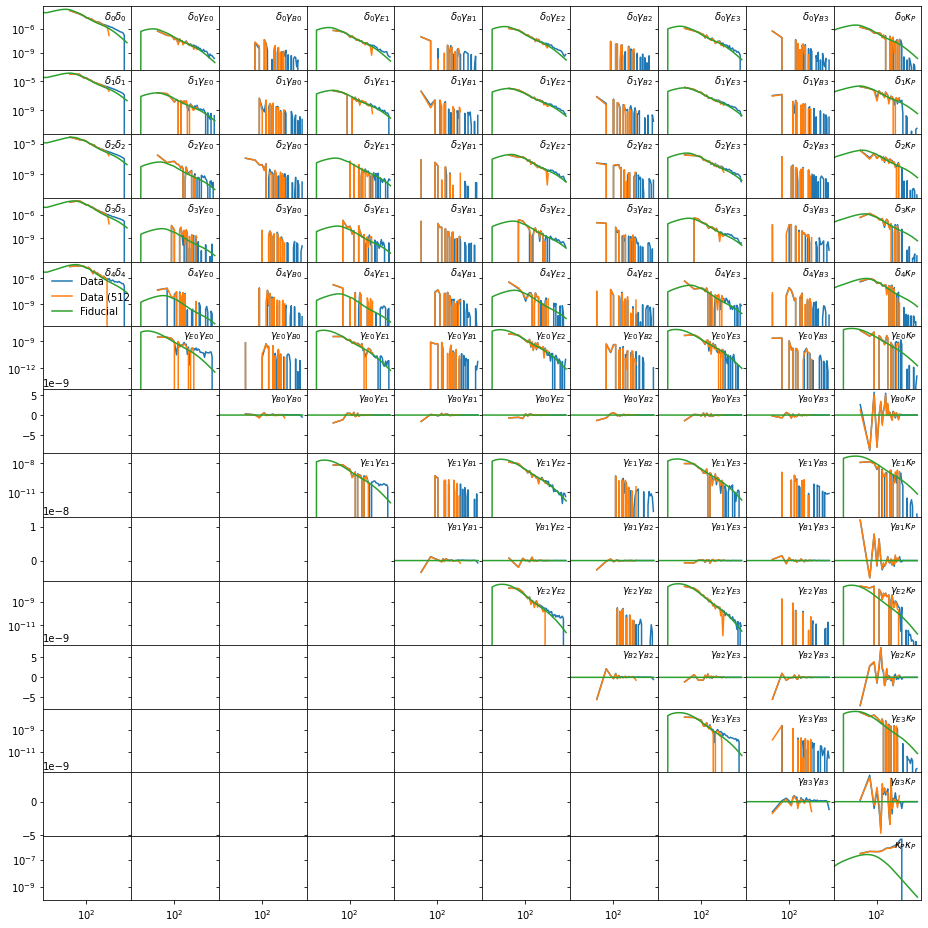

In [14]:
f, axs = plt.subplots(14, 10, figsize=(13, 13), sharex=True, sharey='row', gridspec_kw={'hspace':0, 'wspace':0})

labels = ['\delta_0', '\delta_1', '\delta_2', '\delta_3', '\delta_4',
          '\gamma_{E0}', '\gamma_{B0}', '\gamma_{E1}', '\gamma_{B1}', 
          '\gamma_{E2}', '\gamma_{B2}', '\gamma_{E3}', '\gamma_{B3}', 
          '\kappa_P']


# gc-gc
for i, itype in enumerate(gclist):
    cls = obs_cls_all[i, i]
    axs[i, 0].semilogx(lbpw, cls, label='Data')
    cls = obs_cls_all512[i, i]
    axs[i, 0].semilogx(lbpw512, cls, label='Data (512)')
    clsfid = np.load(fiddir + 'cls_DES{0}_DES{0}.npz'.format(itype))
    axs[i, 0].semilogx(clsfid['ells'], clsfid['cls'], label='Fiducial')
    axs[i, 0].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[i]), horizontalalignment='right',
                   verticalalignment='top', transform=axs[i, 0].transAxes)

# gc-wl
for i, itype in enumerate(gclist):
    for j, jtype in enumerate(shlist):
        jcls = 5 + 2*j
        jxplot = 1 + 2*j 
        clsfid = np.load(fiddir + 'cls_DES{0}_DES{1}.npz'.format(itype, jtype))


        
        cls = obs_cls_all[i, jcls] # E
        axs[i, jxplot].semilogx(lbpw, cls, label='Data')
        cls = obs_cls_all512[i, jcls] # 512
        axs[i, jxplot].semilogx(lbpw512, cls, label='Data (512)')
        axs[i, jxplot].semilogx(clsfid['ells'], clsfid['cls'], label='Fiducial')
        axs[i, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[jcls]), horizontalalignment='right',
            verticalalignment='top', transform=axs[i, jxplot].transAxes)
        
        cls = obs_cls_all[i, jcls + 1] # B
        axs[i, jxplot+1].semilogx(lbpw, cls, label='Data')
        cls = obs_cls_all512[i, jcls + 1] # 512
        axs[i, jxplot+1].semilogx(lbpw512, cls, label='Data (512)')
        axs[i, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')
        axs[i, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[i, jxplot+1].transAxes)
        
# wl-wl
for i, itype in enumerate(shlist):
    icls = 5 + 2*i
    ixplot = 5 + 2*i 
    for j, jtype in enumerate(shlist[i:], i):        
        jcls = 5 + 2*j
        jxplot = 1 + 2*j
        clsfid = np.load(fiddir + 'cls_DES{0}_DES{1}.npz'.format(itype, jtype))
        
        cls = obs_cls_all[icls, jcls] # EE
        axs[ixplot, jxplot].semilogx(lbpw, cls, label='Data')
        cls = obs_cls_all512[icls, jcls] # 512
        axs[ixplot, jxplot].semilogx(lbpw512, cls, label='Data (512)')
        axs[ixplot, jxplot].semilogx(clsfid['ells'], clsfid['cls'], label='Fiducial')
        axs[ixplot, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[icls], labels[jcls]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot, jxplot].transAxes)
        
        cls = obs_cls_all[icls, jcls + 1] # EB
        axs[ixplot, jxplot+1].semilogx(lbpw, cls, label='Data')
        cls = obs_cls_all512[icls, jcls + 1] # 512
        axs[ixplot, jxplot+1].semilogx(lbpw512, cls, label='Data (512)')
        axs[ixplot, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')
        axs[ixplot, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[icls], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot, jxplot+1].transAxes)
        
        if itype != jtype:
            cls = obs_cls_all[icls+1, jcls] # BE
            axs[ixplot+1, jxplot].semilogx(lbpw, cls, label='Data')
            cls = obs_cls_all512[icls+1, jcls] # 512
            axs[ixplot+1, jxplot].semilogx(lbpw512, cls, label='Data (512)')
            axs[ixplot+1, jxplot].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')
            axs[ixplot+1, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[icls+1], labels[jcls]),
                                       horizontalalignment='right', verticalalignment='top',
                                       transform=axs[ixplot+1, jxplot].transAxes)
        
        cls = obs_cls_all[icls+1, jcls + 1] # BB
        axs[ixplot+1, jxplot+1].semilogx(lbpw, cls, label='Data')
        cls = obs_cls_all512[icls+1, jcls + 1] # 512
        axs[ixplot+1, jxplot+1].semilogx(lbpw512, cls, label='Data (512)')
        axs[ixplot+1, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, label='Fiducial')        
        axs[ixplot+1, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[icls+1], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot+1, jxplot+1].transAxes)    

# all - cv
for i, itype in enumerate(gclist + 2*shlist + cvlist):
    cls = obs_cls_all[i, -1]
    axs[i, -1].semilogx(lbpw, cls, label='Data')
    cls = obs_cls_all512[i, -1] # 512
    axs[i, -1].semilogx(lbpw512, cls, label='Data (512)')
    clsfid = np.load(fiddir + 'cls_{}{}_PLAcv.npz'.format('DES' if itype != 'PLAcv' else '', itype))
    if '_{B' in labels[i]:
        axs[i, -1].semilogx(clsfid['ells'], clsfid['cls']*0, label='Fiducial')
    else:
        axs[i, -1].semilogx(clsfid['ells'], clsfid['cls'], label='Fiducial')
        
    axs[i, -1].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[-1]), horizontalalignment='right',
                   verticalalignment='top', transform=axs[i, -1].transAxes)

    
for i, label in enumerate(labels):
    if not '_{B' in label:
        axs[i, 0].set_yscale('log')
    
# for ixplot in range(5, 9):
#     for jxplot in range(6):
#         if (ixplot > 4) and (jxplot < ixplot - 4):
#             axs[ixplot, jxplot].set_visible(False)
#         if (ixplot > 4) and (jxplot == ixplot - 4):
#             axs[ixplot, jxplot].set_xlabel(r'$\ell$')
#             axs[ixplot, jxplot].set_ylabel(r'$10^{{ {} }} C_{{\ell}}$'.format(int(floor)))
#             axs[ixplot, jxplot].xaxis.set_tick_params(which='both', labelbottom=True)
#             axs[ixplot, jxplot].yaxis.set_tick_params(which='both', labelbottom=True)
            
axs[4,0].legend(loc='lower left', frameon=False)

plt.tight_layout()
plt.show()
plt.close()

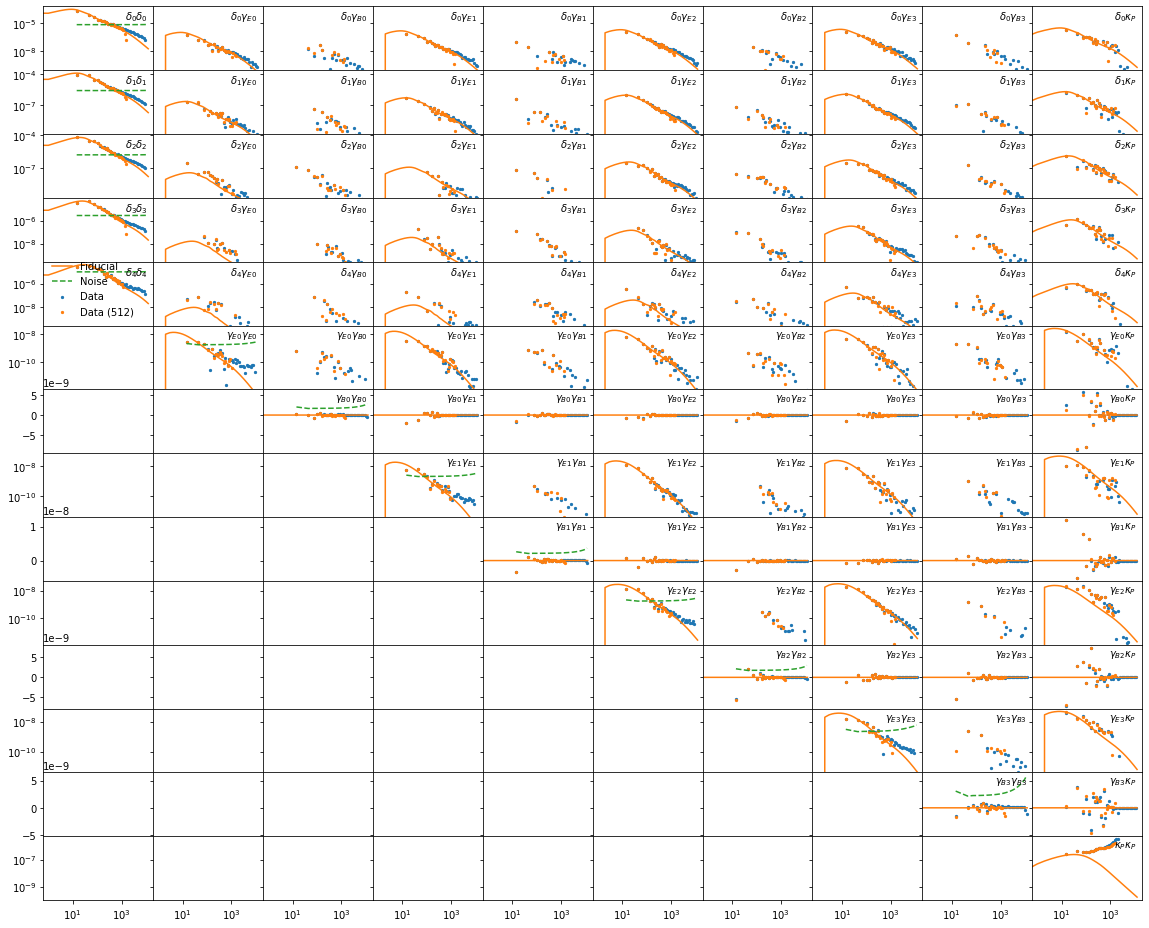

In [15]:
f, axs = plt.subplots(14, 10, figsize=(16, 13), sharex=True, sharey='row', gridspec_kw={'hspace':0, 'wspace':0})

labels = ['\delta_0', '\delta_1', '\delta_2', '\delta_3', '\delta_4',
          '\gamma_{E0}', '\gamma_{B0}', '\gamma_{E1}', '\gamma_{B1}', 
          '\gamma_{E2}', '\gamma_{B2}', '\gamma_{E3}', '\gamma_{B3}', 
          '\kappa_P']


# gc-gc
for i, itype in enumerate(gclist):
    cls = obs_cls_all[i, i]
    axs[i, 0].scatter(lbpw, cls, s=5, label='Data')
    cls = obs_cls_all512[i, i]
    axs[i, 0].scatter(lbpw512, cls, s=5, label='Data (512)')
    clsfid = np.load(fiddir + 'cls_DES{0}_DES{0}.npz'.format(itype))
    axs[i, 0].semilogx(clsfid['ells'], clsfid['cls'], c=DCOLORS[1], label='Fiducial')
    axs[i, 0].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[i]), horizontalalignment='right',
                   verticalalignment='top', transform=axs[i, 0].transAxes)

# gc-wl
for i, itype in enumerate(gclist):
    for j, jtype in enumerate(shlist):
        jcls = 5 + 2*j
        jxplot = 1 + 2*j 
        clsfid = np.load(fiddir + 'cls_DES{0}_DES{1}.npz'.format(itype, jtype))


        
        cls = obs_cls_all[i, jcls] # E
        axs[i, jxplot].scatter(lbpw, cls, s=5, label='Data')
        cls = obs_cls_all512[i, jcls] # E
        axs[i, jxplot].scatter(lbpw512, cls, s=5, label='Data (512)')
        axs[i, jxplot].semilogx(clsfid['ells'], clsfid['cls'], c=DCOLORS[1], label='Fiducial')
        axs[i, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[jcls]), horizontalalignment='right',
            verticalalignment='top', transform=axs[i, jxplot].transAxes)
        
        cls = obs_cls_all[i, jcls + 1] # B
        axs[i, jxplot+1].scatter(lbpw, cls, s=5, label='Data')
        cls = obs_cls_all512[i, jcls + 1] # B
        axs[i, jxplot+1].scatter(lbpw512, cls, s=5, label='Data (512)')
        axs[i, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, c=DCOLORS[1], label='Fiducial')
        axs[i, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[i, jxplot+1].transAxes)
        
# wl-wl
for i, itype in enumerate(shlist):
    icls = 5 + 2*i
    ixplot = 5 + 2*i 
    for j, jtype in enumerate(shlist[i:], i):        
        jcls = 5 + 2*j
        jxplot = 1 + 2*j
        clsfid = np.load(fiddir + 'cls_DES{0}_DES{1}.npz'.format(itype, jtype))
        
        cls = obs_cls_all[icls, jcls] # EE
        axs[ixplot, jxplot].scatter(lbpw, cls, s=5, label='Data')
        cls = obs_cls_all512[icls, jcls] # EE
        axs[ixplot, jxplot].scatter(lbpw512, cls, s=5, label='Data (512)')
        axs[ixplot, jxplot].semilogx(clsfid['ells'], clsfid['cls'], c=DCOLORS[1], label='Fiducial')
        axs[ixplot, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[icls], labels[jcls]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot, jxplot].transAxes)
        
        cls = obs_cls_all[icls, jcls + 1] # EB
        axs[ixplot, jxplot+1].scatter(lbpw, cls, s=5, label='Data')
        cls = obs_cls_all512[icls, jcls + 1] # EB
        axs[ixplot, jxplot+1].scatter(lbpw512, cls, s=5, label='Data (512)')
        axs[ixplot, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, c=DCOLORS[1], label='Fiducial')
        axs[ixplot, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[icls], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot, jxplot+1].transAxes)
        
        if itype != jtype:
            cls = obs_cls_all[icls+1, jcls] # BE
            axs[ixplot+1, jxplot].scatter(lbpw, cls, s=5, label='Data')
            cls = obs_cls_all512[icls+1, jcls] # BE
            axs[ixplot+1, jxplot].scatter(lbpw512, cls, s=5, label='Data (512)')
            axs[ixplot+1, jxplot].semilogx(clsfid['ells'], clsfid['cls'] * 0, c=DCOLORS[1], label='Fiducial')
            axs[ixplot+1, jxplot].text(0.95, 0.95, '${}{}$'.format(labels[icls+1], labels[jcls]),
                                       horizontalalignment='right', verticalalignment='top',
                                       transform=axs[ixplot+1, jxplot].transAxes)
        
        cls = obs_cls_all[icls+1, jcls + 1] # BB
        axs[ixplot+1, jxplot+1].scatter(lbpw, cls, s=5, label='Data')
        cls = obs_cls_all512[icls+1, jcls + 1] # BB
        axs[ixplot+1, jxplot+1].scatter(lbpw512, cls, s=5, label='Data (512)')
        axs[ixplot+1, jxplot+1].semilogx(clsfid['ells'], clsfid['cls'] * 0, c=DCOLORS[1], label='Fiducial')        
        axs[ixplot+1, jxplot+1].text(0.95, 0.95, '${}{}$'.format(labels[icls+1], labels[jcls+1]), horizontalalignment='right',
            verticalalignment='top', transform=axs[ixplot+1, jxplot+1].transAxes)    

# all - cv
for i, itype in enumerate(gclist + 2*shlist + cvlist):
    cls = obs_cls_all[i, -1]
    axs[i, -1].scatter(lbpw, cls, s=5, label='Data')
    cls = obs_cls_all512[i, -1]
    axs[i, -1].scatter(lbpw512, cls, s=5, label='Data (512)')
    clsfid = np.load(fiddir + 'cls_{}{}_PLAcv.npz'.format('DES' if itype != 'PLAcv' else '', itype))
    if '_{B' in labels[i]:
        axs[i, -1].semilogx(clsfid['ells'], clsfid['cls']*0, c=DCOLORS[1], label='Fiducial')
    else:
        axs[i, -1].semilogx(clsfid['ells'], clsfid['cls'], c=DCOLORS[1], label='Fiducial')
        
    axs[i, -1].text(0.95, 0.95, '${}{}$'.format(labels[i], labels[-1]), horizontalalignment='right',
                   verticalalignment='top', transform=axs[i, -1].transAxes)

for i, nls in enumerate(desgc_nls_arr):
    axs[i, 0].semilogx(lbpw, nls, c=DCOLORS[2], ls='--', label='Noise')

for i, nls in enumerate(dessh_nls_arr):
    axs[2*i + 5, 2*i +1].semilogx(lbpw, nls[0, 0], c=DCOLORS[2], ls='--', label='Noise')
    axs[2*i + 6, 2*i + 2].semilogx(lbpw, nls[1, 1], c=DCOLORS[2], ls='--', label='Noise')
   
    
for i, label in enumerate(labels):
    if not '_{B' in label:
        axs[i, 0].set_yscale('log')
    else:
        axs[i, 0].set_yscale('linear')
        
    
# for ixplot in range(5, 9):
#     for jxplot in range(6):
#         if (ixplot > 4) and (jxplot < ixplot - 4):
#             axs[ixplot, jxplot].set_visible(False)
#         if (ixplot > 4) and (jxplot == ixplot - 4):
#             axs[ixplot, jxplot].set_xlabel(r'$\ell$')
#             axs[ixplot, jxplot].set_ylabel(r'$10^{{ {} }} C_{{\ell}}$'.format(int(floor)))
#             axs[ixplot, jxplot].xaxis.set_tick_params(which='both', labelbottom=True)
#             axs[ixplot, jxplot].yaxis.set_tick_params(which='both', labelbottom=True)
            
axs[4,0].legend(loc='lower left', frameon=False)

plt.tight_layout()
plt.show()
plt.close()